МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


<h1 align="center">Course Rulles</h1> 

Курс будет состоять из 12 Лекций и 4 Гостевых лекций (от лучших в стране специалистов ;)). 

**Домашнее задание**
- Будет выдаваться после каждого семинара, иногда это будут контексты
- Задание необходимо сдать в течении 6 дней после семинара
- Задание оценивается  1, если вы его сделали достаточно хорошо
- Задание оценивается  0, если вы не выполнили задание или сделали много ГРУБЫХ ошибок 
- Задание оценивается -1, если вы его списали (и тому кто и тому у кого)
- Задание сданные после дедлайна не проверяются
- **PS**: Каждый 0 или -1 это доп. вопрос на экзамене, который идет в итоговую оценку за экзамен. 

**Контексты**

- Будет проведено 4 контекста 
- Задание необходимо сдать в течении 6 дней после семинара
- Вы получаете 1 балл если побили бейзлайн и коротко текстом описали решение 0 если нет
- Бонусы получают первых три человека в каждой в группе

**Экзамен**

- Будет экзамен, автоматов не будет
- Будет список вопросов 
- Будет теор. минимум

**Оценка**

Финальная оценка будет вычисляться, как
    $$mark = [exam\_creidts > c_0] \cdot (c_1 \cdot hw\_credits + c_2 \cdot contest\_credits + c_3 \cdot exam\_creidts)$$
коэффициенты будут объявлены позже

<h1 align="center">In the previous series</h1> 

### Linear Model Theoretical Background

Мы хотим научиться предсказывать какую-то величину $y_i$ по каким-то признакам $x_i$.

Линейные модели, это набор методов которые предполагают, что целевое значение ($y_i$) может быть восстановлено, как линейная комбинация признаков ($x_i$). 

$$\hat{y}_i(x_i, w) = x_i \cdot w^T$$

<img src="img/linear_model.png">

Для обучения модели, вводится функция потерь $L_i(\hat{y}_i(x_i), y_i)$, к примеру:
- Для регрессии:
$$L_i(\hat{y}_i(x_i, w), y_i) = (\hat{y}_i(x_i, w) - y_i)^2$$ 
- Для классификации: 
$$L_i(\hat{y}_i(x_i, w), y_i) = \sum_{y_i} y_i \log \hat{y}_i(x_i, w)$$
Целевой функцией является сумма ошибок по всем объектам тренировочной выборки

$$L(X, Y, w) = \sum_{x_i} L_i(y_i(x_i, w), y_i) \rightarrow \min_w$$

Оптимизируем функцию:
- Если данных много -- стохастические, градиентные методы 

$$w_k = w_{k-1} - step\_length \cdot \frac{dL}{dw}$$

- Если данных мало -- методы второго порядка, использующие гессиан (HFN, LBFGS, ...)

### Trees Theoretical Background

Мы решаем всю ту-же задачу, только теперь хотим предсказать неизвестное значение не как линейную комбинацию признаков, а как дерево, в каждом узле которого есть какие-то правила. 

<img src="img/tree_model.png">

<center> Предсказание смерти пассажиров Титаника. </center>

Для обучения модели обычно используется жадная стратегия, которая стремиться как можно сильнее разделить классы (снизить ошибку предсказания) при построении каждого листа дерева. К примеру можно строить пороговые функции (x_i > w_i) минимизируя следующие функции:
- Для задачи классификации -- ответ, номер класса с большей вероятностью
$$ H(Y_{leaf}) = |leaf\_left|\sum_{y \in Y_{leaf\_left}} p(y) log~p(y) + |leaf\_right|\sum_{y \in Y_{leaf\_right}} p(y) log~p(y)$$
- Для задачи регрессии, ответ среднее значение в листе
$$ MSE(Y_{leaf}) = |leaf\_left| \sum_{y \in Y_{leaf_left}} (E(y) - y)^2 + |leaf\_right| \sum_{y \in Y_{leaf_right}} (E(y) - y)^2$$

### Some Facts about a Trees and a Linear models

- Linear Model
    - Слишком простые
    - Не сильно меняются при небольшом изменении выборки
- Tree Model
    - Слишком сложные -- легко закодировать всю выборку деревом
    - Сильно меняются при небольшом изменении выборки

### Загрузим датасет титаник

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [36]:
titanic = pd.read_csv('./dataset/titanic/train.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
sex_encoder = LabelEncoder()
titanic.Sex = sex_encoder.fit_transform(titanic.Sex)
features = ['Pclass', 'Sex', 'Age', 'Fare']
X, y = titanic[features].values, titanic.Survived.values

X = np.nan_to_num(X)

### Обучим диненую модель на разных подвыборках, похожи-ли коэфиценты?

In [5]:
from sklearn.linear_model import LogisticRegression

for n_items in [200, 500]:
    reg = LogisticRegression().fit(X[:n_items], y[:n_items])
    print 'n_items', n_items, 'w = ',', '.join(map(lambda x: '%.4f' % x, reg.coef_[0]))

n_items 200 w =  -0.4027, -2.3487, -0.0196, -0.0004
n_items 500 w =  -0.6117, -2.4663, -0.0112, 0.0017


### Обучем деревья на тех-же подвыборках, похожи-ли деревья?

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree1 = DecisionTreeClassifier().fit(X[:200], y[:200])
tree2 = DecisionTreeClassifier().fit(X[:500], y[:500])

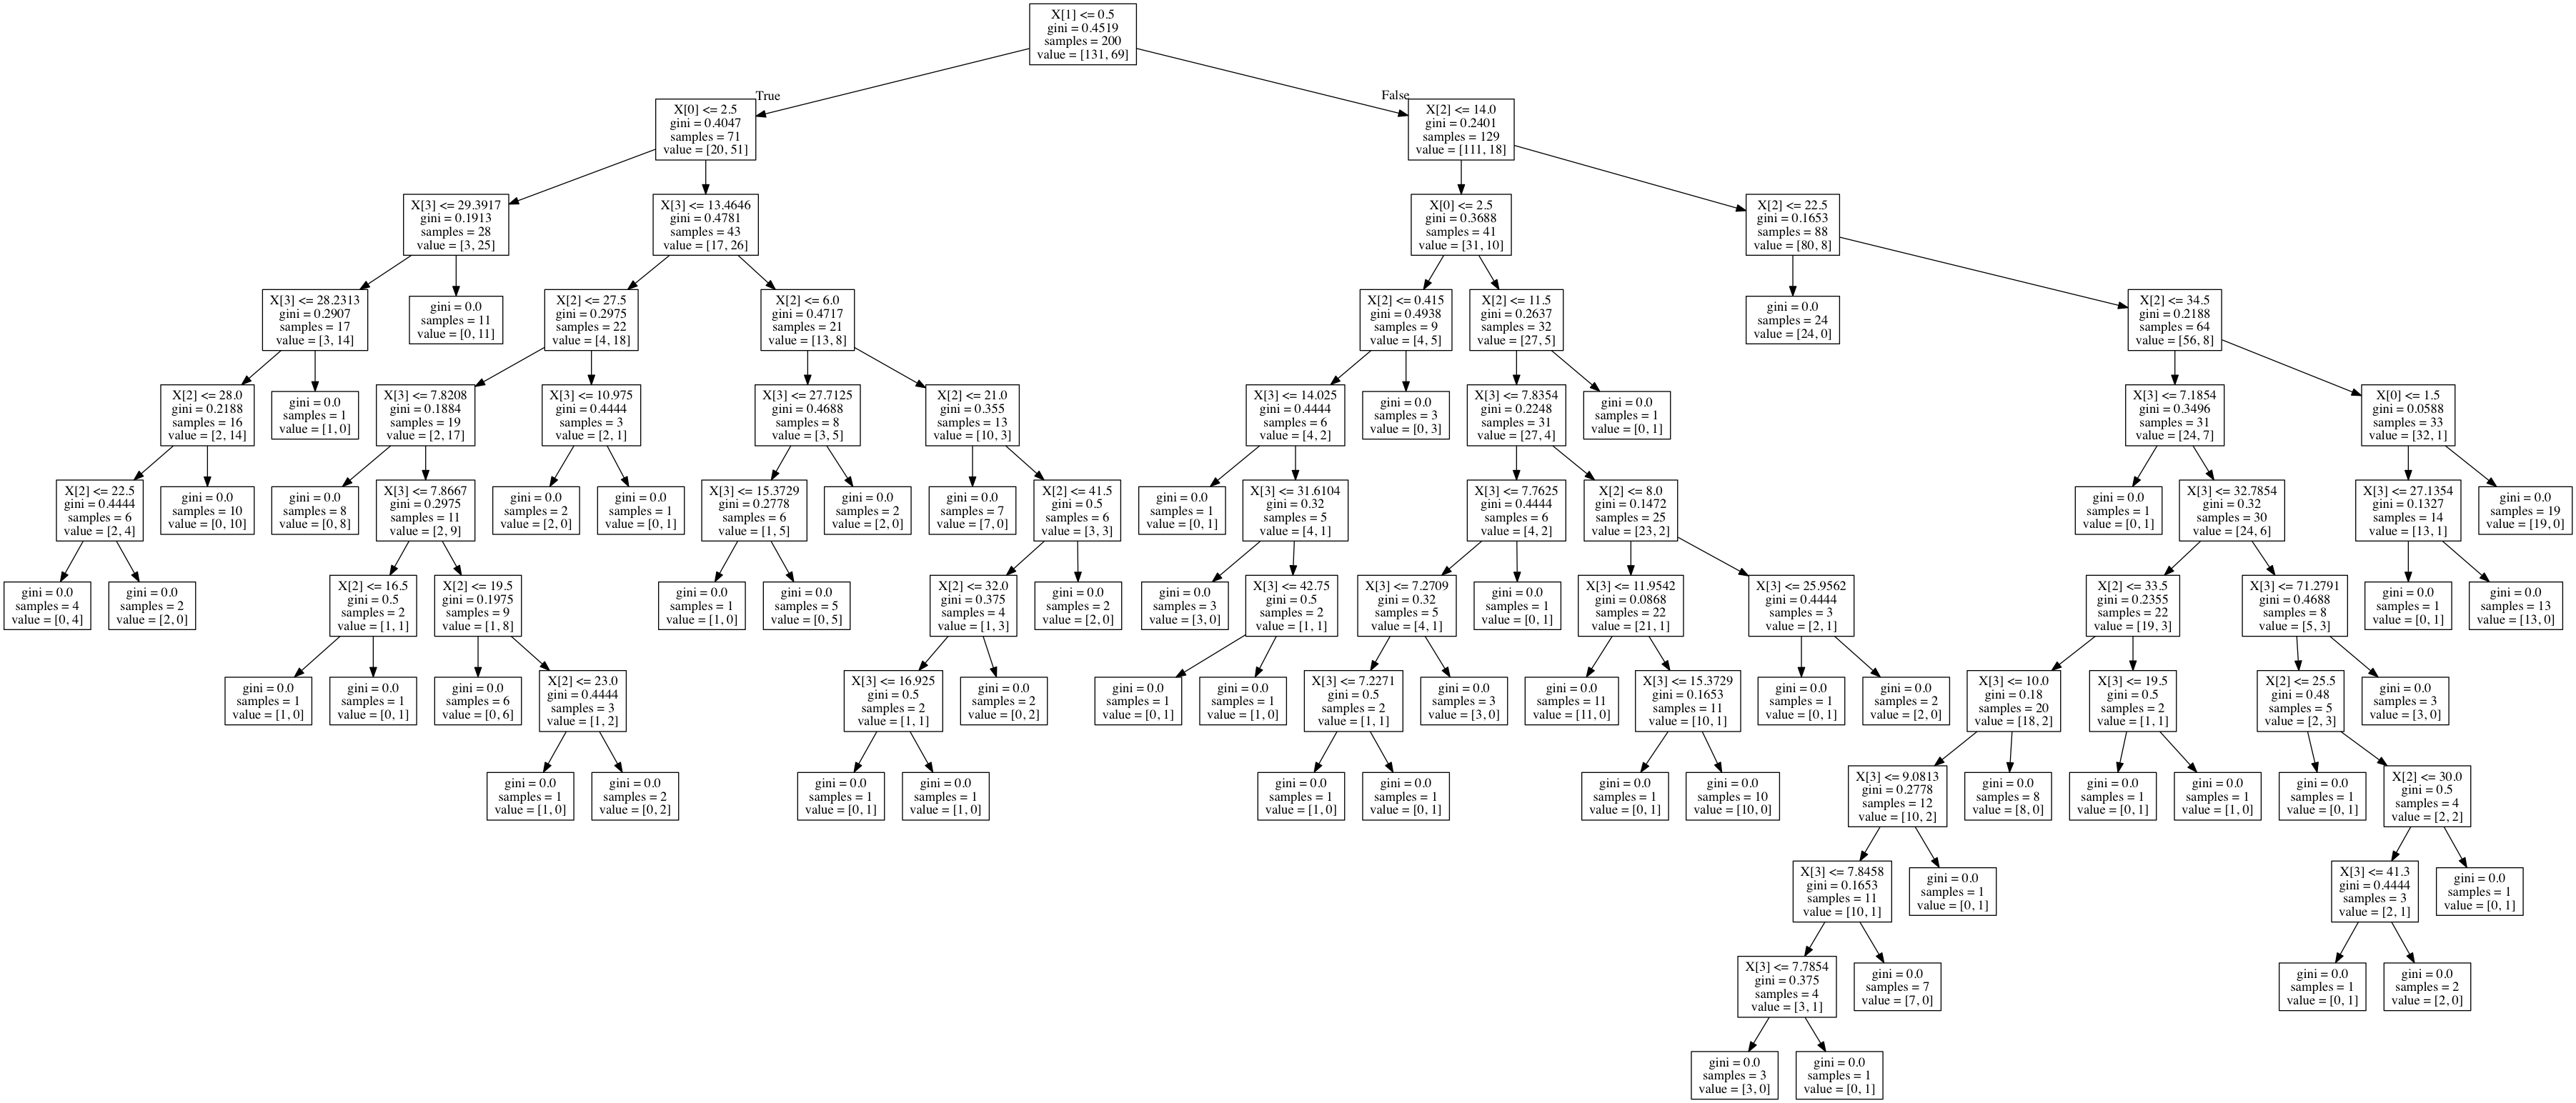

In [7]:
import pydot 
from StringIO import StringIO
from IPython.display import Image  

dot_data = StringIO()  
export_graphviz(tree1, out_file=dot_data)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0] 
Image(graph.create_png())  

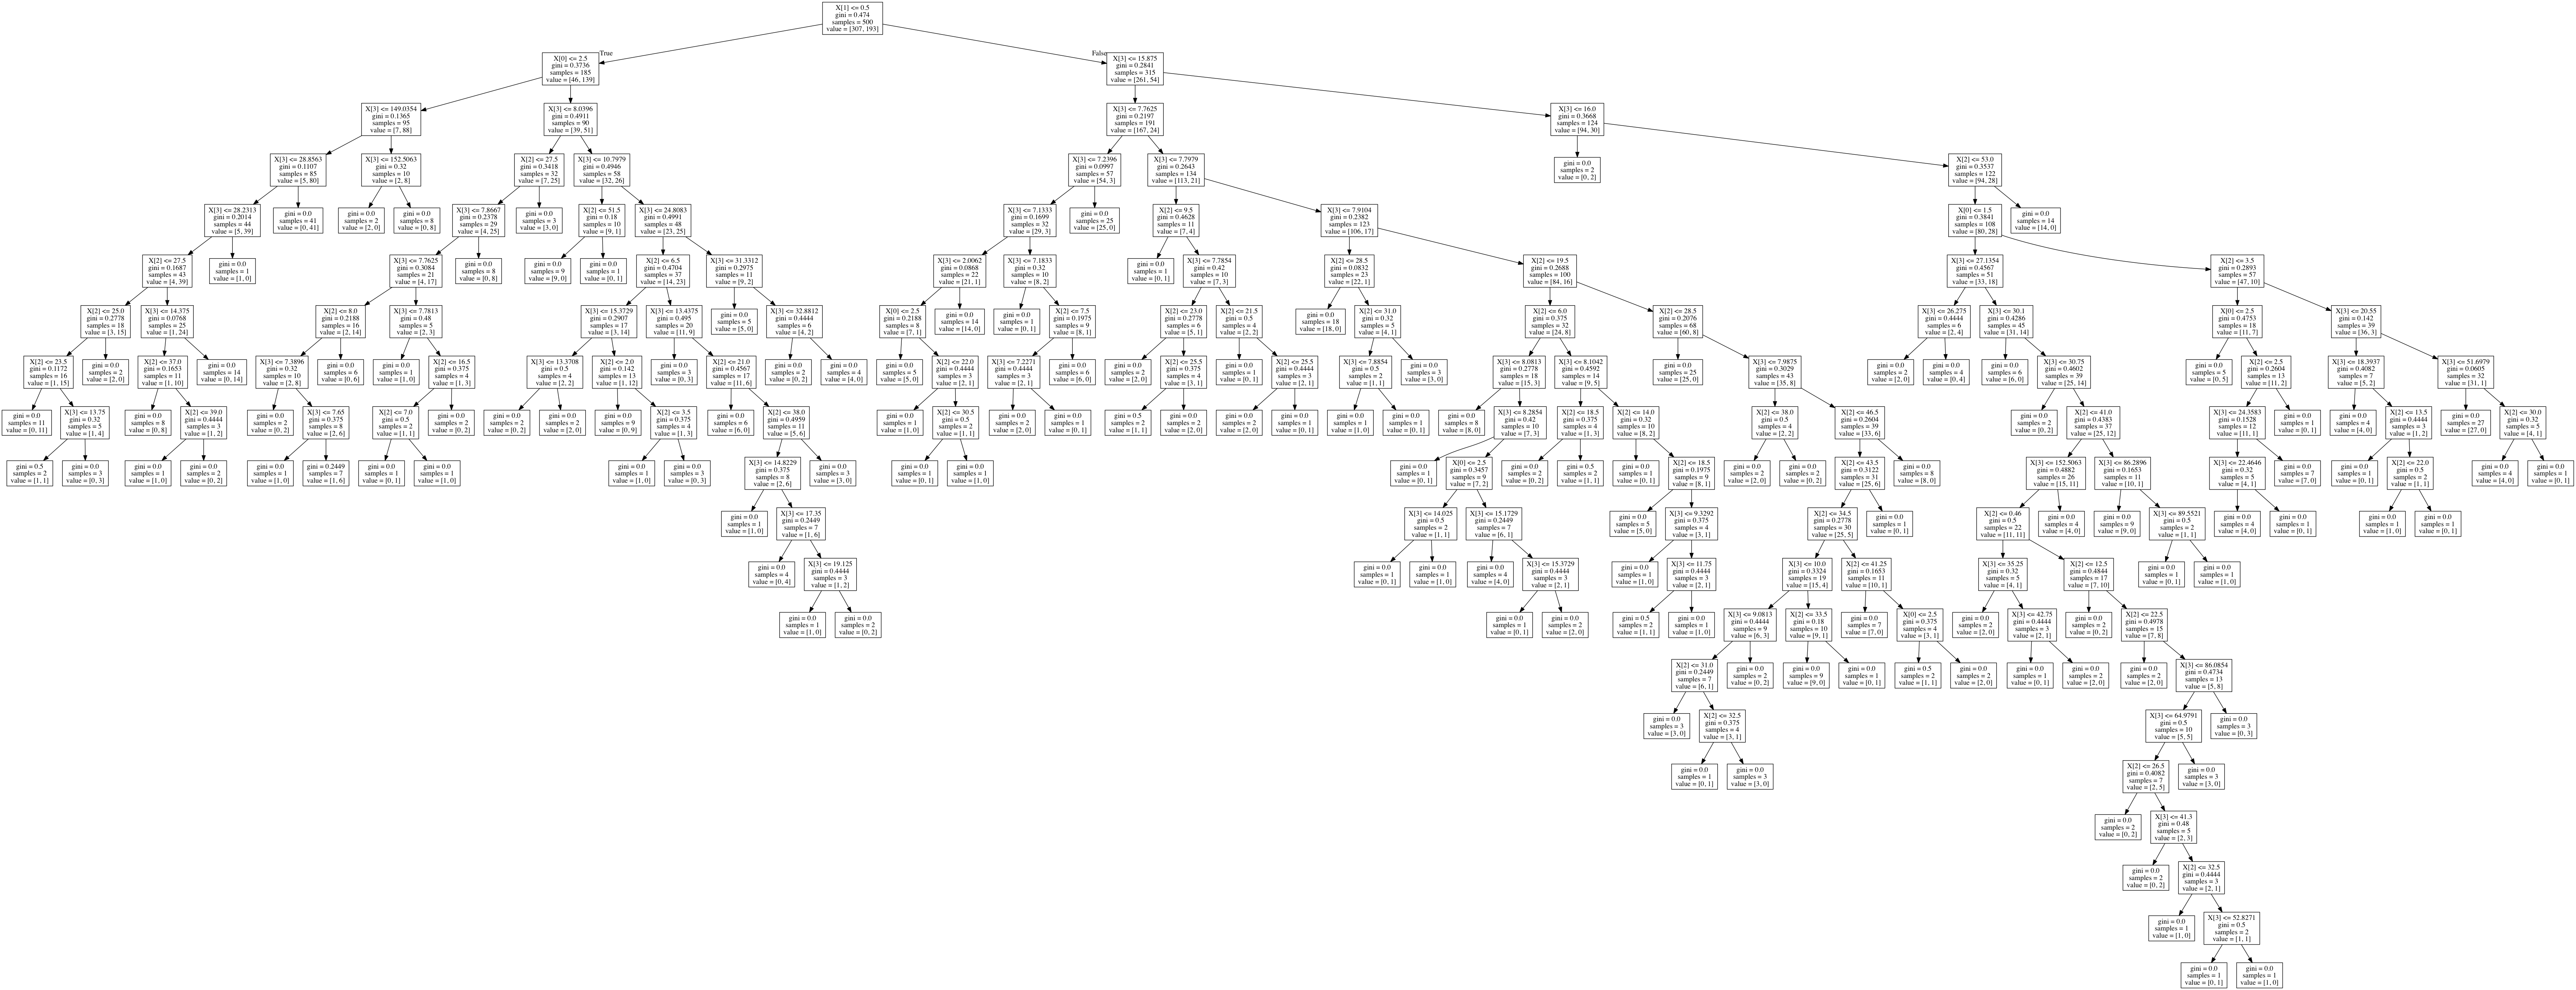

In [8]:
dot_data = StringIO()  
export_graphviz(tree2, out_file=dot_data)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0] 
Image(graph.create_png()) 

Давайте разберемся, что происходит

<h1 align="center">Bias-variance tradeoff</h1> 

### Teoretical Background

#### Какя природа бывает у ошибок

<img src="img/bv_darts.png", width=400>

#### Как это отражается на моделе

<img src="img/bv_model_complex.png">

### Teoretical Task

$$\mathrm{E}\Big[\big(y - \hat{f}(x)\big)^2\Big] = \mathrm{Bias}\big[\hat{f}(x)\big]^2 + \mathrm{Var}\big[\hat{f}(x)\big] + \sigma^2 \\$$

---------
$$ \mathrm{Bias}\big[\hat{f}(x)\big] = \mathrm{E}\big[\hat{f}(x) - f(x)\big] $$


and

$$\mathrm{Var}\big[\hat{f}(x)\big] = \mathrm{E}[\hat{f}(x)^2] - \mathrm{E}[\hat{f}(x)]^2$$

----------


<img src="img/bvts.png">

<h1 align="center">Bagging</h1> 

### Theoretical Background

- Усреднение моделей
- Работает по тому что не ухудшает смещение а разброс уменьшается линейно (если алгоритмы не коррелированы)
- Нужны модели с маленьким смещением (Какие???)
- Нужны не коррелированные модели

Help: Раздел 3.2 https://github.com/esokolov/ml-course-msu/blob/master/ML15-spring/lecture-notes/Sem04_ensembles.pdf  

### Смещение для беггинга

<img src="img/bag_mu1.png">

<img src="img/bag_mu2.png">

### Разброс для беггинга

<img src="img/bag_var1.png">

<img src="img/bag_var2.png">

<img src="img/bag_var3.png">

### Practical Task Model Сorrelation (Linear and Trees Bagging)

### Read data

In [9]:
adult = pd.read_csv(
    './dataset/adult/adult.data.txt', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")

In [10]:
adult.head(2)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [11]:
adult = pd.get_dummies(adult)

In [12]:
adult.head(2)

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
adult["Target"] = adult["Target_ >50K"]

In [14]:
adult.columns[:-3]

Index([u'Age', u'fnlwgt', u'Education-Num', u'Capital Gain', u'Capital Loss',
       u'Hours per week', u'Workclass_ ?', u'Workclass_ Federal-gov',
       u'Workclass_ Local-gov', u'Workclass_ Never-worked',
       ...
       u'Country_ Portugal', u'Country_ Puerto-Rico', u'Country_ Scotland',
       u'Country_ South', u'Country_ Taiwan', u'Country_ Thailand',
       u'Country_ Trinadad&Tobago', u'Country_ United-States',
       u'Country_ Vietnam', u'Country_ Yugoslavia'],
      dtype='object', length=108)

In [15]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values

### Model correlation

In [16]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier

### Бегинг на лог-регрессиях 

In [17]:
from sklearn.linear_model import LogisticRegression

clf1 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)
scores1 = cross_val_score(clf1, X, y, cv=4, n_jobs=4)

print scores1

[ 0.79609385  0.79422604  0.7990172   0.80061425]


### Бегинг на девевьях

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
scores2 = cross_val_score(clf2, X, y, cv=4, n_jobs=4)

print scores2

[ 0.85259796  0.8546683   0.85859951  0.85724816]


### Натренируем модели и вытащим базовые алгоритмы

In [19]:
X_train, y_train, X_test, y_test = X[:20000], y[:20000], X[20000:], y[20000:]

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)

In [20]:
X_test.shape

(12561, 108)

In [21]:
clf1.estimators_[0].predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

### Посмотрим на корреляцию предсказаний

In [22]:
pred1 = [clf.predict(X_test) for clf in clf1.estimators_]
pred2 = [clf.predict(X_test) for clf in clf2.estimators_]

In [23]:
from scipy.stats import pearsonr

In [24]:
pearsonr(pred1[0], pred1[1])[0]

(0.95735449540686612, 0.0)

In [25]:
pearsonr(pred2[0], pred2[1])[0]

(0.53526762917442949, 0.0)

In [26]:
A = np.zeros((len(clf1.estimators_), len(clf1.estimators_)))

for i in range(len(clf1.estimators_)):
    for j in range(len(clf1.estimators_)):
        A[i, j] = pearsonr(pred1[i], pred1[j])[0]

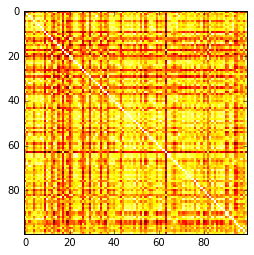

In [27]:
pylab.imshow(A, interpolation='none', cmap='hot')

In [28]:
A = np.zeros((len(clf1.estimators_), len(clf1.estimators_)))

for i in range(len(clf1.estimators_)):
    for j in range(len(clf1.estimators_)):
        A[i, j] = pearsonr(pred2[i], pred2[j])[0]

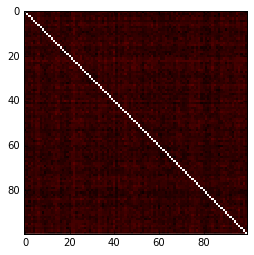

In [29]:
pylab.imshow(A, interpolation='none', cmap='hot')

###  Есть-ли Overfitting с увиличением числа деревьев и сложности?

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print 'n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc)

n_estimators =   10 train_acc = 0.98845 test_acc = 0.845076028979
n_estimators =   40 train_acc = 0.99915 test_acc = 0.855664357933
n_estimators =  100 train_acc =  1.0 test_acc = 0.857813868323
n_estimators =  200 train_acc =  1.0 test_acc = 0.855743969429
n_estimators =  600 train_acc =  1.0 test_acc = 0.857336199347
n_estimators = 1000 train_acc =  1.0 test_acc = 0.859485709736
CPU times: user 10.2 s, sys: 5.69 s, total: 15.8 s
Wall time: 4min 30s


In [33]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print 'n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc)

n_estimators =   10 train_acc = 0.8617 test_acc = 0.857176976355
n_estimators =   40 train_acc = 0.86165 test_acc = 0.857256587851
n_estimators =  100 train_acc = 0.86255 test_acc = 0.857256587851
n_estimators =  200 train_acc = 0.8616 test_acc = 0.857415810843
n_estimators =  600 train_acc = 0.8621 test_acc = 0.857256587851
n_estimators = 1000 train_acc = 0.86135 test_acc = 0.856938141868
CPU times: user 6.92 s, sys: 1.51 s, total: 8.43 s
Wall time: 2min 30s


In [34]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=14), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print 'n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc)

n_estimators =   10 train_acc = 0.90855 test_acc = 0.858530371786
n_estimators =   40 train_acc = 0.91125 test_acc = 0.862351723589
n_estimators =  100 train_acc = 0.9128 test_acc = 0.862988615556
n_estimators =  200 train_acc = 0.91365 test_acc = 0.863068227052
n_estimators =  600 train_acc = 0.9138 test_acc = 0.862510946581
n_estimators = 1000 train_acc = 0.91345 test_acc = 0.86330706154
CPU times: user 7.65 s, sys: 2.51 s, total: 10.2 s
Wall time: 3min 38s


<h1 align="center">Resume</h1> 

**Смещение и разброс**:
    - Ошибки бывают разные
    - Ошибку можно разложить на составляющие, чтобы лучше понимать что происходит
    - Это может помочь нам придумать хорошие алгоритмы и понимать, как такие алгоритмы будут работать

**Bagging**:
    - Одна из лучших техник для построения алгоритмов ML
    - Линейно уменьшает Разброс и не уменьшает Смещение 
    - Слабое переобучение
    - НО переобучение ЕСТЬ -- от сложности одного алгоритма, лучше все-же немного обрезать деревья

**Что почтитать**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU
    - 2.9 Model Selection and the Bias–Variance Tradeoff 
    - 15 Random Forests
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ
- Andrew Ng, Bias vs. Variance, https://goo.gl/1ISZ6Y 